In [48]:
import os,sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import pygeos
import geopandas as gpd
import contextily as cx
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy import interpolate
import seaborn as sns
import pyproj
import pygeos
from mpl_toolkits.axes_grid1 import make_axes_locatable

# path to python scripts
sys.path.append(os.path.join('..','src','trails'))


In [49]:
targeted_attack = pd.read_csv('../results/targeted_attack.csv',index_col=[0])


In [50]:
ne_earth = gpd.read_file('C:\\Data\\natural_earth\\ne_10m_admin_0_countries.shp')

In [51]:
gdf_tar = ne_earth.merge(targeted_attack,left_on='ADM0_A3',right_index=True)

In [52]:
import cartopy.crs as ccrs
# Define the CartoPy CRS object.
crs = ccrs.Mollweide()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init

df_epsg = gdf_tar.to_crs(crs_proj4)

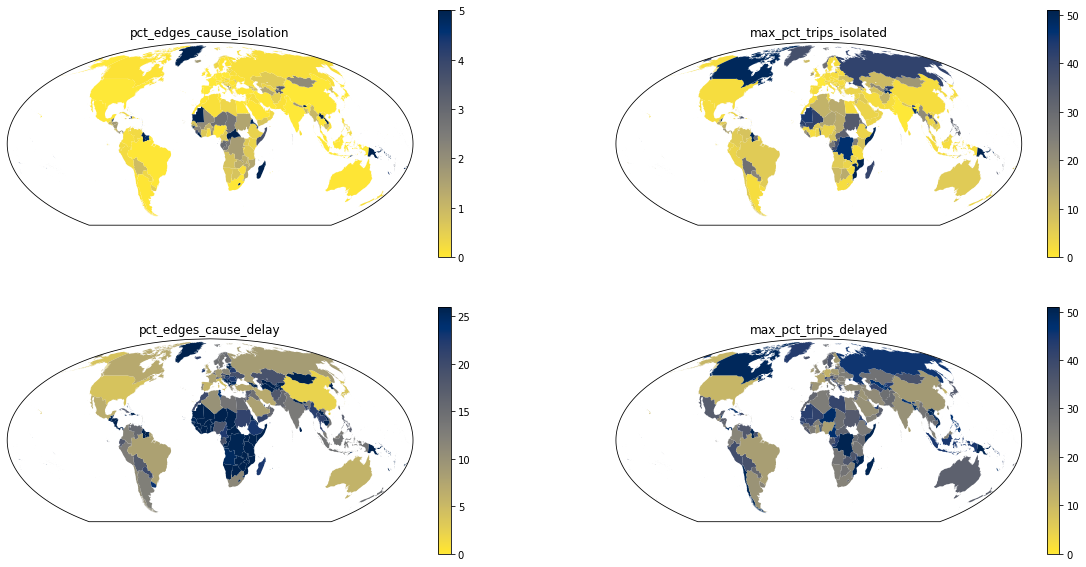

In [81]:
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': crs},
                        figsize=(20, 10))

for iter_,ax in enumerate(axs.flatten()):
    
    if iter_ == 0:
        # Make the isolated plot
        df_epsg.plot(column='pct_edges_cause_isolation',ax=ax, cmap='cividis_r',legend=True,vmin=0,vmax=5)
        ax.set_title("pct_edges_cause_isolation")  
    elif iter_ == 1:
        df_epsg.plot(column='max_pct_trips_isolated',ax=ax, cmap='cividis_r',legend=True,vmin=0,vmax=51)    
        ax.set_title("max_pct_trips_isolated")          
    elif iter_ == 2:
        df_epsg.plot(column='pct_edges_cause_delay',ax=ax, cmap='cividis_r',legend=True,vmin=0,vmax=26)
        ax.set_title("pct_edges_cause_delay")  
    elif iter_ == 3:
        df_epsg.plot(column='max_pct_trips_delayed',ax=ax, cmap='cividis_r',legend=True,vmin=0,vmax=51)
        ax.set_title("max_pct_trips_delayed")  
        
fig.savefig(os.path.join('..','figures','targeted_attack.svg'))        

In [71]:
targeted_attack.max_pct_trips_delayed.quantile(q=0.90)

49.282000000000004